# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



Dataset Overview:
   HoursWorked  FocusScore  ProductivityScore   Department  YearsAtCompany  \
0         42.4         6.3            3127.96  Engineering              17   
1         34.0         7.2            4742.60           HR               8   
2         47.2         5.6            2044.73        Sales              15   
3         38.4         9.0            5818.92           HR               5   
4         36.4         2.5            1841.31        Sales               9   

   TeamMeetingsPerWeek    DeskLocation  
0                    0       Open Plan  
1                    6  Private Office  
2                    3          Remote  
3                    6  Private Office  
4                    6          Remote  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HoursWorked          300 non-null    float6

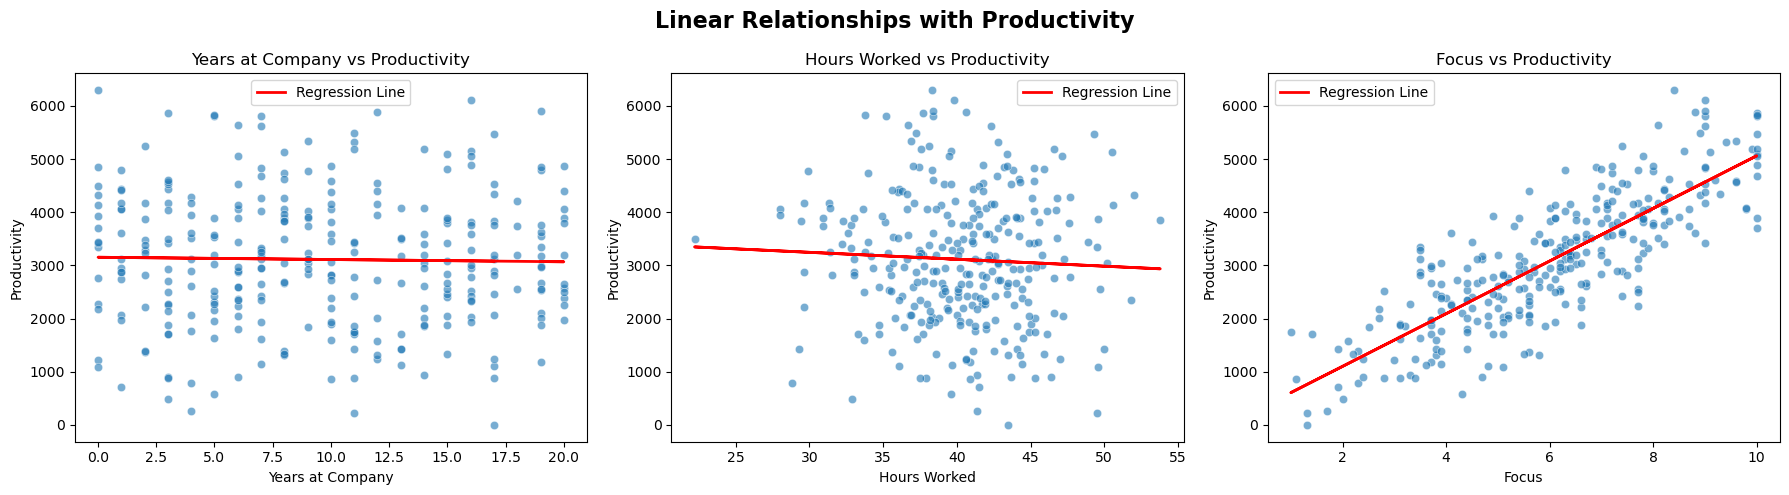


PART 1 SUMMARY: R-squared Comparison
Years at Company R-squared: 0.0004
Hours Worked R-squared:     0.0026
Focus R-squared:            0.6777

BEST PREDICTOR: Focusscore (R² = 0.6777)

PART 2: Building on the best predictor with additional features

Base Model: Focusscore
Base Model R-squared: 0.6777

--------------------------------------------------------------------------------
Examining DEPARTMENT
--------------------------------------------------------------------------------


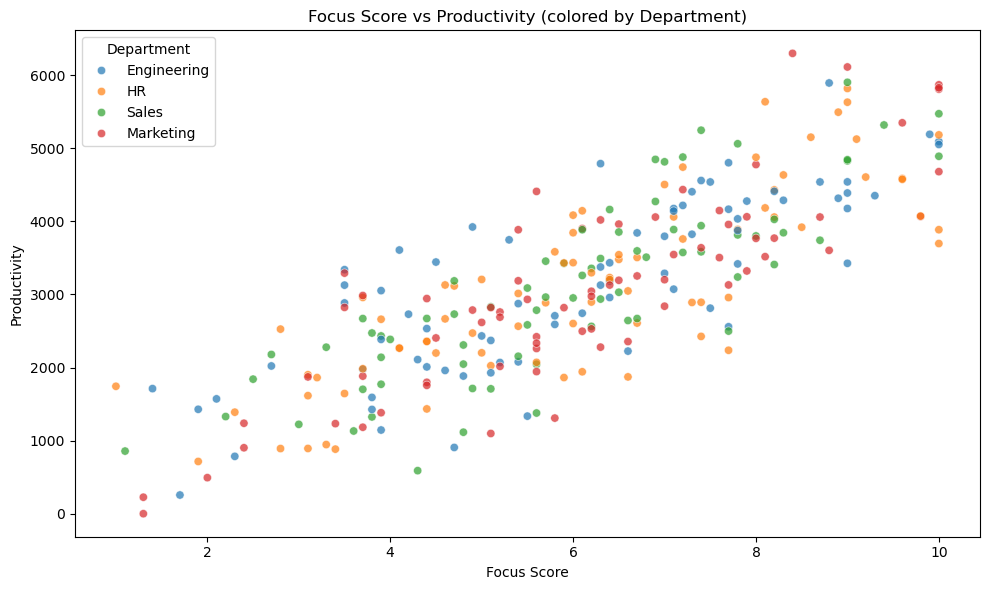

Base Model R-squared:            0.6777
Model with Department R-squared: 0.6788
Improvement: 0.0011
✗ Department does not meaningfully improve the model

--------------------------------------------------------------------------------
Examining MEETINGS PER WEEK
--------------------------------------------------------------------------------


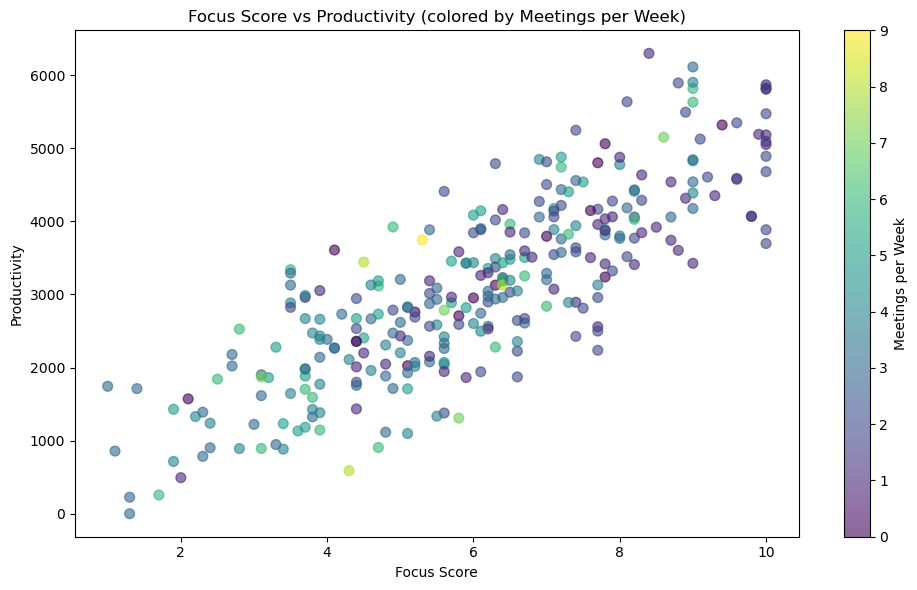

Base Model R-squared:                0.6777
Model with Meetings R-squared:       0.6784
Improvement: 0.0007
✗ Meetings per week does not meaningfully improve the model

--------------------------------------------------------------------------------
Examining DESK LOCATION
--------------------------------------------------------------------------------


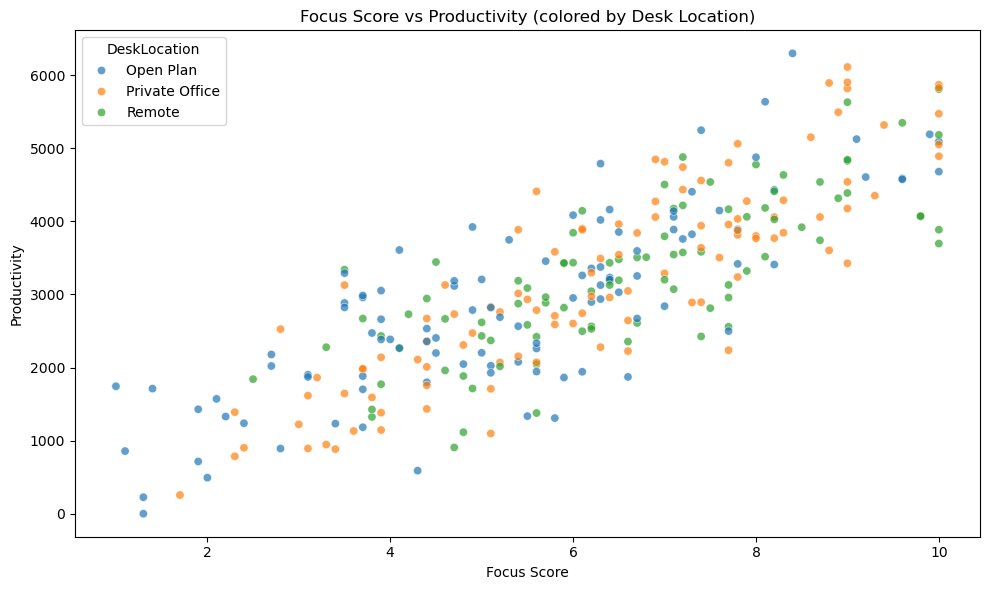

Base Model R-squared:               0.6777
Model with Desk Location R-squared: 0.6819
Improvement: 0.0042
✗ Desk location does not meaningfully improve the model

BUILDING FINAL MODEL

Feature Improvements:
Department: +0.0011
TeamMeetingsPerWeek: +0.0007
DeskLocation: +0.0042

Features in final model: ['Focus Score']

Final Model R-squared: 0.6777
Improvement over base model: +0.0000

Model Coefficients:
  Focus Score: 494.9319
  Intercept: 114.3813

PART 3: SUMMARY AND RECOMMENDATIONS

KEY FINDINGS:
--------------------------------------------------------------------------------

1. PRIMARY DRIVER OF PRODUCTIVITY:
   Focus Score is the strongest predictor of employee productivity
   (R² = 0.6777, explaining 67.8% of variance)

2. ADDITIONAL FACTORS:
   ✗ DeskLocation does NOT significantly improve prediction (+0.0042)
   ✗ Department does NOT significantly improve prediction (+0.0011)
   ✗ TeamMeetingsPerWeek does NOT significantly improve prediction (+0.0007)

3. FINAL MODEL PERFORM

In [1]:
"""
Employee Productivity Analysis
Following the model-building techniques taught in class
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Load the data
df = pd.read_csv('Employee_productivity.csv')

# Display basic info about the dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

print("\n" + "="*80)
print("PART 1: Determine which feature has the strongest linear relationship")
print("="*80)

# We'll examine three features: YearsAtCompany, HoursWorked, and FocusScore
# Create visualizations and calculate R-squared for each

# Set up the figure for three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Linear Relationships with Productivity', fontsize=16, fontweight='bold')

# Feature 1: Years at Company vs Productivity
print("\n1. YEARS AT COMPANY vs PRODUCTIVITY")
print("-" * 50)

# Scatter plot
sns.scatterplot(data=df, x='YearsAtCompany', y='ProductivityScore', ax=axes[0], alpha=0.6)
axes[0].set_xlabel('Years at Company')
axes[0].set_ylabel('Productivity')
axes[0].set_title('Years at Company vs Productivity')

# Fit linear regression model
X_years = df[['YearsAtCompany']].values
y = df['ProductivityScore'].values

model_years = LinearRegression()
model_years.fit(X_years, y)
y_pred_years = model_years.predict(X_years)

# Plot regression line
axes[0].plot(df['YearsAtCompany'], y_pred_years, color='red', linewidth=2, label='Regression Line')
axes[0].legend()

# Calculate R-squared
r2_years = r2_score(y, y_pred_years)
print(f"R-squared: {r2_years:.4f}")
print(f"Slope: {model_years.coef_[0]:.4f}")
print(f"Intercept: {model_years.intercept_:.4f}")

# Feature 2: Hours Worked vs Productivity
print("\n2. HOURS WORKED vs PRODUCTIVITY")
print("-" * 50)

# Scatter plot
sns.scatterplot(data=df, x='HoursWorked', y='ProductivityScore', ax=axes[1], alpha=0.6)
axes[1].set_xlabel('Hours Worked')
axes[1].set_ylabel('Productivity')
axes[1].set_title('Hours Worked vs Productivity')

# Fit linear regression model
X_hours = df[['HoursWorked']].values

model_hours = LinearRegression()
model_hours.fit(X_hours, y)
y_pred_hours = model_hours.predict(X_hours)

# Plot regression line
axes[1].plot(df['HoursWorked'], y_pred_hours, color='red', linewidth=2, label='Regression Line')
axes[1].legend()

# Calculate R-squared
r2_hours = r2_score(y, y_pred_hours)
print(f"R-squared: {r2_hours:.4f}")
print(f"Slope: {model_hours.coef_[0]:.4f}")
print(f"Intercept: {model_hours.intercept_:.4f}")

# Feature 3: Focus vs Productivity
print("\n3. FOCUS vs PRODUCTIVITY")
print("-" * 50)

# Scatter plot
sns.scatterplot(data=df, x='FocusScore', y='ProductivityScore', ax=axes[2], alpha=0.6)
axes[2].set_xlabel('Focus')
axes[2].set_ylabel('Productivity')
axes[2].set_title('Focus vs Productivity')

# Fit linear regression model
X_focus = df[['FocusScore']].values

model_focus = LinearRegression()
model_focus.fit(X_focus, y)
y_pred_focus = model_focus.predict(X_focus)

# Plot regression line
axes[2].plot(df['FocusScore'], y_pred_focus, color='red', linewidth=2, label='Regression Line')
axes[2].legend()

# Calculate R-squared
r2_focus = r2_score(y, y_pred_focus)
print(f"R-squared: {r2_focus:.4f}")
print(f"Slope: {model_focus.coef_[0]:.4f}")
print(f"Intercept: {model_focus.intercept_:.4f}")

plt.tight_layout()
plt.savefig('part1_linear_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary of Part 1
print("\n" + "="*80)
print("PART 1 SUMMARY: R-squared Comparison")
print("="*80)
print(f"Years at Company R-squared: {r2_years:.4f}")
print(f"Hours Worked R-squared:     {r2_hours:.4f}")
print(f"Focus R-squared:            {r2_focus:.4f}")

# Determine the best predictor
best_predictors = {
    'YearsAtCompany': r2_years,
    'HoursWorked': r2_hours,
    'FocusScore': r2_focus
}
best_feature = max(best_predictors, key=best_predictors.get)
best_r2 = best_predictors[best_feature]

print(f"\nBEST PREDICTOR: {best_feature.replace('_', ' ').title()} (R² = {best_r2:.4f})")
print("\n" + "="*80)
print("PART 2: Building on the best predictor with additional features")
print("="*80)

# Now we'll build on the best predictor by examining other features
# Start with the best single predictor as our base model

if best_feature == 'YearsAtCompany':
    X_base = X_years
    model_base = model_years
elif best_feature == 'HoursWorked':
    X_base = X_hours
    model_base = model_hours
else:
    X_base = X_focus
    model_base = model_focus

print(f"\nBase Model: {best_feature.replace('_', ' ').title()}")
print(f"Base Model R-squared: {best_r2:.4f}")

# Now examine categorical features: department, desk_location
# We'll visualize these using color-coding (hue parameter)

print("\n" + "-"*80)
print("Examining DEPARTMENT")
print("-"*80)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x=best_feature, y='ProductivityScore', hue='Department', ax=ax, alpha=0.7)
ax.set_xlabel(best_feature.replace('At', ' at ').replace('Score', ' Score'))
ax.set_ylabel('Productivity')
ax.set_title(f'{best_feature.replace("At", " at ").replace("Score", " Score")} vs Productivity (colored by Department)')
plt.tight_layout()
plt.savefig('part2_department.png', dpi=300, bbox_inches='tight')
plt.show()

# To test if department improves the model, we need to add it as a feature
# Create dummy variables for department
df_with_dept = pd.get_dummies(df, columns=['Department'], prefix='dept', drop_first=True)

# Build model with best predictor + department
dept_columns = [col for col in df_with_dept.columns if col.startswith('dept_')]
X_with_dept = df_with_dept[[best_feature] + dept_columns].values

model_with_dept = LinearRegression()
model_with_dept.fit(X_with_dept, y)
y_pred_with_dept = model_with_dept.predict(X_with_dept)
r2_with_dept = r2_score(y, y_pred_with_dept)

print(f"Base Model R-squared:            {best_r2:.4f}")
print(f"Model with Department R-squared: {r2_with_dept:.4f}")
print(f"Improvement: {r2_with_dept - best_r2:.4f}")

if r2_with_dept - best_r2 > 0.01:  # Meaningful improvement threshold
    print("✓ Department improves the model significantly")
else:
    print("✗ Department does not meaningfully improve the model")

print("\n" + "-"*80)
print("Examining MEETINGS PER WEEK")
print("-"*80)

# Scatter plot with meetings per week
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df[best_feature], df['ProductivityScore'], 
                     c=df['TeamMeetingsPerWeek'], cmap='viridis', alpha=0.6, s=50)
ax.set_xlabel(best_feature.replace('At', ' at ').replace('Score', ' Score'))
ax.set_ylabel('Productivity')
ax.set_title(f'{best_feature.replace("At", " at ").replace("Score", " Score")} vs Productivity (colored by Meetings per Week)')
plt.colorbar(scatter, ax=ax, label='Meetings per Week')
plt.tight_layout()
plt.savefig('part2_meetings.png', dpi=300, bbox_inches='tight')
plt.show()

# Build model with best predictor + meetings
X_with_meetings = df[[best_feature, 'TeamMeetingsPerWeek']].values

model_with_meetings = LinearRegression()
model_with_meetings.fit(X_with_meetings, y)
y_pred_with_meetings = model_with_meetings.predict(X_with_meetings)
r2_with_meetings = r2_score(y, y_pred_with_meetings)

print(f"Base Model R-squared:                {best_r2:.4f}")
print(f"Model with Meetings R-squared:       {r2_with_meetings:.4f}")
print(f"Improvement: {r2_with_meetings - best_r2:.4f}")

if r2_with_meetings - best_r2 > 0.01:
    print("✓ Meetings per week improves the model significantly")
else:
    print("✗ Meetings per week does not meaningfully improve the model")

print("\n" + "-"*80)
print("Examining DESK LOCATION")
print("-"*80)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x=best_feature, y='ProductivityScore', hue='DeskLocation', ax=ax, alpha=0.7)
ax.set_xlabel(best_feature.replace('At', ' at ').replace('Score', ' Score'))
ax.set_ylabel('Productivity')
ax.set_title(f'{best_feature.replace("At", " at ").replace("Score", " Score")} vs Productivity (colored by Desk Location)')
plt.tight_layout()
plt.savefig('part2_desk_location.png', dpi=300, bbox_inches='tight')
plt.show()

# Build model with best predictor + desk location
df_with_desk = pd.get_dummies(df, columns=['DeskLocation'], prefix='desk', drop_first=True)
desk_columns = [col for col in df_with_desk.columns if col.startswith('desk_')]
X_with_desk = df_with_desk[[best_feature] + desk_columns].values

model_with_desk = LinearRegression()
model_with_desk.fit(X_with_desk, y)
y_pred_with_desk = model_with_desk.predict(X_with_desk)
r2_with_desk = r2_score(y, y_pred_with_desk)

print(f"Base Model R-squared:               {best_r2:.4f}")
print(f"Model with Desk Location R-squared: {r2_with_desk:.4f}")
print(f"Improvement: {r2_with_desk - best_r2:.4f}")

if r2_with_desk - best_r2 > 0.01:
    print("✓ Desk location improves the model significantly")
else:
    print("✗ Desk location does not meaningfully improve the model")

# Build the full model with all significant features
print("\n" + "="*80)
print("BUILDING FINAL MODEL")
print("="*80)

# Start with the best base predictor
features_to_include = [best_feature]
improvements = {
    'Department': r2_with_dept - best_r2,
    'TeamMeetingsPerWeek': r2_with_meetings - best_r2,
    'DeskLocation': r2_with_desk - best_r2
}

# Add features that improve the model
print("\nFeature Improvements:")
for feature, improvement in improvements.items():
    print(f"{feature}: {improvement:+.4f}")
    if improvement > 0.01:
        if feature == 'Department':
            features_to_include.extend(dept_columns)
        elif feature == 'TeamMeetingsPerWeek':
            features_to_include.append('TeamMeetingsPerWeek')
        elif feature == 'DeskLocation':
            features_to_include.extend(desk_columns)

# Build final model
print(f"\nFeatures in final model: {[f.replace('At', ' at ').replace('Score', ' Score') for f in features_to_include]}")

# Prepare the data with all dummy variables
df_final = pd.get_dummies(df, columns=['Department', 'DeskLocation'], drop_first=True)

# Select only the features we're using
X_final = df_final[[col for col in features_to_include if col in df_final.columns]].values

model_final = LinearRegression()
model_final.fit(X_final, y)
y_pred_final = model_final.predict(X_final)
r2_final = r2_score(y, y_pred_final)

print(f"\nFinal Model R-squared: {r2_final:.4f}")
print(f"Improvement over base model: {r2_final - best_r2:+.4f}")

# Print coefficients for interpretation
print("\nModel Coefficients:")
feature_names = [col for col in features_to_include if col in df_final.columns]
for name, coef in zip(feature_names, model_final.coef_):
    print(f"  {name.replace('At', ' at ').replace('Score', ' Score')}: {coef:.4f}")
print(f"  Intercept: {model_final.intercept_:.4f}")

print("\n" + "="*80)
print("PART 3: SUMMARY AND RECOMMENDATIONS")
print("="*80)

print("\nKEY FINDINGS:")
print("-" * 80)

# Analyze the results
print(f"\n1. PRIMARY DRIVER OF PRODUCTIVITY:")
print(f"   {best_feature.replace('At', ' at ').replace('Score', ' Score')} is the strongest predictor of employee productivity")
print(f"   (R² = {best_r2:.4f}, explaining {best_r2*100:.1f}% of variance)")

print(f"\n2. ADDITIONAL FACTORS:")
for feature, improvement in sorted(improvements.items(), key=lambda x: x[1], reverse=True):
    if improvement > 0.01:
        print(f"   ✓ {feature.replace('At', ' at ').replace('Score', ' Score')} significantly improves prediction (+{improvement:.4f})")
    else:
        print(f"   ✗ {feature.replace('At', ' at ').replace('Score', ' Score')} does NOT significantly improve prediction (+{improvement:.4f})")

print(f"\n3. FINAL MODEL PERFORMANCE:")
print(f"   R² = {r2_final:.4f} (explaining {r2_final*100:.1f}% of variance in productivity)")

print("\n" + "-" * 80)
print("RECOMMENDATIONS FOR IMPROVING EMPLOYEE PRODUCTIVITY:")
print("-" * 80)

# Generate recommendations based on findings
recommendations = []

# Based on best predictor
if best_feature == 'FocusScore':
    recommendations.append("Focus is the strongest driver of productivity. Invest in:")
    recommendations.append("  - Noise-cancelling tools and quiet spaces")
    recommendations.append("  - Training on concentration techniques")
    recommendations.append("  - Policies that minimize interruptions")
elif best_feature == 'HoursWorked':
    if model_base.coef_[0] > 0:
        recommendations.append("Hours worked positively correlate with productivity, but be careful:")
        recommendations.append("  - Monitor for burnout and work-life balance")
        recommendations.append("  - Ensure overtime is sustainable, not indicating inefficiency")
    else:
        recommendations.append("More hours worked does NOT mean more productivity:")
        recommendations.append("  - Focus on efficiency over hours")
        recommendations.append("  - Reduce unnecessary overtime")
elif best_feature == 'YearsAtCompany':
    if model_base.coef_[0] > 0:
        recommendations.append("Experience matters. To improve productivity:")
        recommendations.append("  - Implement mentorship programs pairing senior and junior staff")
        recommendations.append("  - Focus on employee retention initiatives")
    else:
        recommendations.append("Tenure may be associated with lower productivity:")
        recommendations.append("  - Implement continuous learning and development programs")
        recommendations.append("  - Re-engage experienced employees with new challenges")

# Based on secondary factors
if improvements['TeamMeetingsPerWeek'] > 0.01:
    # Check if coefficient is positive or negative
    idx = [i for i, name in enumerate(feature_names) if name == 'TeamMeetingsPerWeek']
    if idx and model_final.coef_[idx[0]] > 0:
        recommendations.append("\nMeetings positively impact productivity (when appropriate):")
        recommendations.append("  - Maintain collaborative meeting culture")
        recommendations.append("  - Ensure meetings are well-structured and necessary")
    else:
        recommendations.append("\nExcessive meetings reduce productivity:")
        recommendations.append("  - Audit and reduce unnecessary meetings")
        recommendations.append("  - Implement 'no meeting' focus time blocks")
elif improvements['TeamMeetingsPerWeek'] <= 0.01:
    recommendations.append("\nMeetings do not significantly impact productivity:")
    recommendations.append("  - Current meeting balance appears acceptable")
    recommendations.append("  - Focus resources on other factors")

if improvements['DeskLocation'] > 0.01:
    recommendations.append("\nDesk location matters for productivity:")
    recommendations.append("  - Offer flexible work arrangements based on job role")
    recommendations.append("  - Provide choice between remote, private, and collaborative spaces")
elif improvements['DeskLocation'] <= 0.01:
    recommendations.append("\nDesk location does not significantly impact productivity:")
    recommendations.append("  - The remote vs in-office debate is NOT supported by data")
    recommendations.append("  - Focus on other factors rather than mandating office presence")

if improvements['Department'] > 0.01:
    recommendations.append("\nDepartment-specific productivity patterns exist:")
    recommendations.append("  - Tailor productivity initiatives by department")
    recommendations.append("  - Share best practices from high-performing departments")
else:
    recommendations.append("\nProductivity drivers are consistent across departments:")
    recommendations.append("  - Company-wide initiatives will be effective")

for rec in recommendations:
    print(rec)

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("\nVisualizations saved:")
print("  - part1_linear_relationships.png")
print("  - part2_department.png")
print("  - part2_meetings.png")
print("  - part2_desk_location.png")